# Using Python to analyze financial data and test automated strategies
Computational Finance, Université de Bordeaux, December 11 and 13, 2017

Nicolas Mauhé ([nicolas.mauhe@u-bordeaux.fr](mailto:nicolas.mauhe@u-bordeaux.fr))

## Table of Contents
1. [Introduction](#Introduction)
2. [Analyzing financial data](#Analyzing-financial-data)
3. [Computing financial indicators](#Computing-financial-indicators)
4. [Designing automated strategies](#Designing-automated-strategies)
1. [Selecting algos](#Selecting-algos)
1. [Customising strategies](#Customising-strategies)
1. [Combining several strategies](#Combining-several-strategies)
1. [Using professional data](#Using-professional-data)
1. [Putting it all into practice](#Putting-it-all-into-practice)
1. [Going further](#Going-further)

## Introduction

Bt is a simple Python package that can be used to fetch financial data, analyze them, establish algorithmic trading strategies, and backtest them. A complete description of the package can be found [here](http://pmorissette.github.io/bt/). It is an open-source package : which means you can access the code behind it on its [github repository](https://github.com/pmorissette/bt). Most of the Python packages work this way : so please get used to using other people work and to reading package documentations, because that is the way Python works. 

Each time you see a cell with some code in it, click on it and then on the "Run" button at the top of the page. You can also click on the cell and then use the shortcut Ctrl + Enter. Feel free to modify every cell and to run them again ! This course is made for you to experiment, and learn how to use Python. So feel free to test anything !

We first allow matplotlib in the notebook in order to have nice graphs, and we import the packages we need:
- bt to do backtesting
- pandas to use data
- numpy to do some math

In [1]:
%matplotlib inline
import bt
import pandas as pd
import numpy as np
print("We are good to go !")

We are good to go !


Let's start by choosing which stock we want to invest in. We will focus on US equity. We can use any ticker symbol of any US Equity. A list can be found [here](http://eoddata.com/symbols.aspx). Let's choose three companies.

We can use the bt method `bt.get()` to fetch financial data from Yahoo. To know how a method work, we can always use the python method help().

In [ ]:
help(bt.get)

This is a bit "raw", but it can be useful. Another solution is to check the [package documentation](http://pmorissette.github.io/bt/index.html). Here is how to use `bt.get()`:

In [3]:
equity_list = ['AAPL', 'MCD', 'MSFT']
data = bt.get(equity_list, start='2010-01-01')
print data.head()

                 aapl        mcd       msft
Date                                       
2009-12-31  26.986492  48.665546  24.766968
2010-01-04  27.406532  48.930527  25.148876
2010-01-05  27.453915  48.556431  25.157001
2010-01-06  27.017223  47.893948  25.002611
2010-01-07  26.967278  48.244671  24.742592


There we go ! We can now import data from any security, as long as it is available on [Yahoo Finance](https://finance.yahoo.com/).

## Analyzing financial data

We can check the type of this new Python object by using the method type()

In [ ]:
type(data)

It is a dataframe of the package Pandas, the most used Python package to do data analysis.
We can check the features of a pandas dataframe by using the method dir().

In [ ]:
dir(data)

There are a lot of things, and methods are mixed up with attributes. It is easier to check the Pandas documentation about [dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). One can see that some interesting methods are present, such as the one used to plot the data on a graph, plot().


In [ ]:
data.plot()

We can also find the method hist(), used to plot an histogram of the values.

In [ ]:
data.hist()

An interesting argument for the drawing methods such as plot() or hist() is the size you want. Just specify figsize = (length, height).

In [ ]:
data.plot(figsize = (15, 10))

Another very useful method is describe(), that gives us summary statistics about the dataset.

In [12]:
print data.describe()

              aapl          mcd         msft
count  2002.000000  2002.000000  2002.000000
mean     82.969177    90.602286    37.975089
std      36.165757    27.075306    16.375199
min      24.594294    47.893948    18.869308
25%      51.978415    74.335978    23.915018
50%      77.660160    85.109948    33.287571
75%     108.746813   108.687355    48.971917
max     175.608719   173.479996    85.580002


Exercise 1 : find a way to 
1. We have seen how to display the first entries of the DataFrame, using head(). Now let's try to display only the most recent prices (the last items of the dataframe). 
2. Let's plot them....
3. Now, let's plot the evolution of these equities during their last 30 quotes.

Solution (3 commands)

In [10]:
# 1
print data.tail()

                  aapl         mcd       msft
Date                                         
2017-12-06  169.009995  173.479996  82.779999
2017-12-07  169.320007  172.910004  82.489998
2017-12-08  169.369995  173.149994  84.160004
2017-12-11  172.669998  173.250000  85.230003
2017-12-12  171.699997  172.229996  85.580002


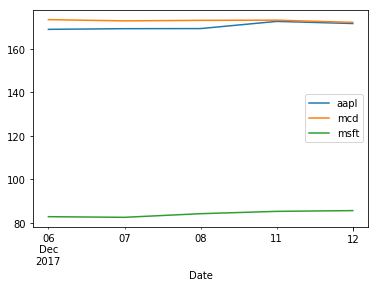

In [8]:
# 2
data.tail().plot()

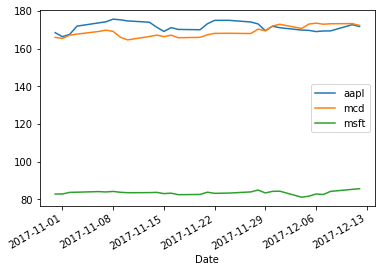

In [9]:
# 3
data.tail(30).plot()

## Computing financial indicators

Let's go further. Some useful bt methods are rebase() and to_returns().

In [ ]:
print data.rebase().head()

In [ ]:
print data.to_returns().head()

The formula of to_returns() is simply (t1 / t0) - 1.

Exercise 2 : produce the two following plots :
1. The price evolution during the last 30 quotes rebased to 100 at the beginning of the plot.
2. The histogram of the returns of the three equities during last year (252 quotes).

Solution (2 commands)

AxesSubplot(0.125,0.2;0.775x0.68)


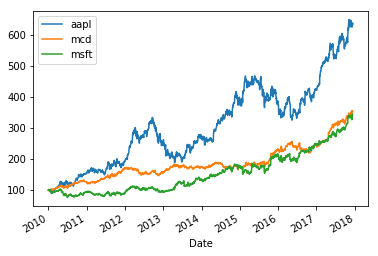

In [13]:
# 1 
data.rebase().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b4658890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f50b4624290>]], dtype=object)

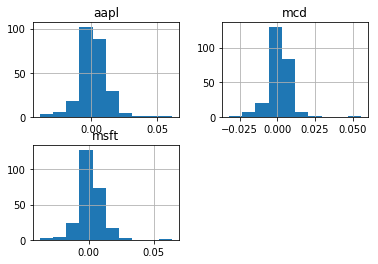

In [14]:
# 2
data.to_returns().tail(252).hist()

Another interesting method available for the data object is corr(). It enables us to compute the correlation matrix of our securities. Let's compute the correlation matrix of the returns.

In [15]:
print data.to_returns().corr()

          aapl       mcd      msft
aapl  1.000000  0.315740  0.396546
mcd   0.315740  1.000000  0.409766
msft  0.396546  0.409766  1.000000


Another method, plot_corr_heatmap, enable us to get a similar result but using a heatmap.

<module 'matplotlib.pyplot' from '/home/xubuntu/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

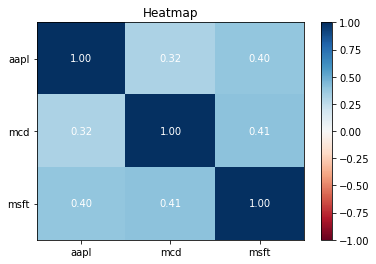

In [16]:
data.to_returns().plot_corr_heatmap()

Now, let's see how to display some more complex financial statistics about our data.

In [17]:
stats = data.calc_stats()
stats.display()

Stat                 aapl        mcd         msft
-------------------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31
End                  2017-12-12  2017-12-12  2017-12-12
Risk-free rate       0.00%       0.00%       0.00%

Total Return         536.24%     253.91%     245.54%
Daily Sharpe         1.05        1.14        0.81
Daily Sortino        1.49        1.66        1.17
CAGR                 26.21%      17.24%      16.88%
Max Drawdown         -43.80%     -15.50%     -26.37%
Calmar Ratio         0.60        1.11        0.64

MTD                  -0.09%      0.15%       1.68%
3m                   7.12%       10.83%      15.17%
6m                   18.96%      17.39%      23.92%
YTD                  50.63%      45.14%      40.80%
1Y                   53.98%      45.12%      40.73%
3Y (ann.)            18.23%      27.62%      25.28%
5Y (ann.)            19.78%      17.65%      29.12%
10Y (ann.)           26.21%      17.24%      16.88%
Since 

What does it mean ?

- Total Return: Total return on the period.
- Daily Sharpe: Daily Sharpe ratio

The Sharpe ratio : $$S(x) = \frac{R_x - r}{\sigma_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma_x$ being the standard deviation of the investment.
The Sharpe ratio measures the return you are receiving in comparison with the risk you are taking.
- Daily Sortino: Daily Sortino ratio

The Sortino ratio (as used in the bt package) is a variation of the Sharpe ratio, taking into account only the negative volatility. The formula is very similar :
$$S^{'}(x) = \frac{R_x - r}{\sigma^-_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma^-_x$ being the downside deviation of the investment.

- CAGR: Compound annual growth rate

The compound annual growth rate (CAGR) :
$${CAGR}(t_0,t_n) = \left( {V(t_n)/V(t_0)} \right)^\frac{1}{t_n-t_0} - 1$$
It is an easy way to have an idea of the "average" return during the period : taking the actual average of the annual returns is not as good, given that volatility can affect the results.

- Max Drawdown: Maximum decline of the equity
- Calmar Ratio: Ratio of the CAGR and the absolute value of the Max Drawdown

 
 
- Daily Mean (ann.): Daily average of return, times the number of trading periods in a year (252)
- Daily Vol (ann.): Same thing with the standard deviation
- Daily Skew: Usual measure of the asymmetry, daily average
- Daily Kurt: Usual measure of "tailedness", daily average
 
  
  
- MTD: The month to date return
- 3m: 3 months ago to date return
- 6m: 6 months
- YTD: The beginning of the year to date return
- 1Y: One year ago to date return
- 3Y: Etc.
- 5Y: Etc.
- 10Y: Be careful : these stats are limited by the data start date !
- Since Incep. (ann.): Same thing !

To get correct statistics (such as Sharpe and Sortino ratios), we have to specify the riskfree rate on the considered period. To estimate the riskfree rate, The Treasury Bonds rate is used. We will use the ticker symbol [IEF](http://eoddata.com/stockquote/NASDAQ/IEF.htm) to determine the riskfree rate.

In [18]:
riskfree =  bt.get('IEF', start='2010-01-01')
riskfree_rate = float(riskfree.calc_cagr())
print riskfree_rate

0.0443766599859


We can now display accurate statistics about our data.

In [19]:
stats.set_riskfree_rate(riskfree_rate)
stats.display()

Stat                 aapl        mcd         msft
-------------------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31
End                  2017-12-12  2017-12-12  2017-12-12
Risk-free rate       4.44%       4.44%       4.44%

Total Return         536.24%     253.91%     245.54%
Daily Sharpe         0.88        0.85        0.62
Daily Sortino        1.25        1.24        0.89
CAGR                 26.21%      17.24%      16.88%
Max Drawdown         -43.80%     -15.50%     -26.37%
Calmar Ratio         0.60        1.11        0.64

MTD                  -0.09%      0.15%       1.68%
3m                   7.12%       10.83%      15.17%
6m                   18.96%      17.39%      23.92%
YTD                  50.63%      45.14%      40.80%
1Y                   53.98%      45.12%      40.73%
3Y (ann.)            18.23%      27.62%      25.28%
5Y (ann.)            19.78%      17.65%      29.12%
10Y (ann.)           26.21%      17.24%      16.88%
Since 

Exercice 3:
1. Plot the price evolution of General Electric and Ford since 2010.
2. Display their financial indicators, with a correct riskfree rate.

Solution

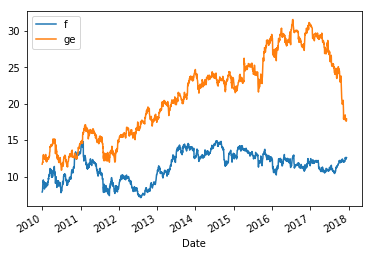

In [21]:
# 1
data_ford_ge = bt.get(['F', 'GE'], start='2010-01-01')
data_ford_ge.plot()

In [22]:
# 2
stats = data_ford_ge.calc_stats()
stats.set_riskfree_rate(riskfree_rate)
stats.display()

Stat                 f           ge
-------------------  ----------  ----------
Start                2009-12-31  2009-12-31
End                  2017-12-12  2017-12-12
Risk-free rate       4.44%       4.44%

Total Return         59.89%      52.98%
Daily Sharpe         0.20        0.15
Daily Sortino        0.27        0.22
CAGR                 6.08%       5.49%
Max Drawdown         -51.92%     -44.13%
Calmar Ratio         0.12        0.12

MTD                  0.64%       -2.08%
3m                   10.06%      -24.35%
6m                   14.54%      -36.97%
YTD                  9.69%       -41.81%
1Y                   3.79%       -41.85%
3Y (ann.)            -0.40%      -7.34%
5Y (ann.)            6.48%       -0.58%
10Y (ann.)           6.08%       5.49%
Since Incep. (ann.)  6.08%       5.49%

Daily Sharpe         0.20        0.15
Daily Sortino        0.27        0.22
Daily Mean (ann.)    9.80%       7.70%
Daily Vol (ann.)     27.84%      21.68%
Daily Skew           -0.29       0.13
D

## Designing automated strategies

You can establish strategies in bt in order to choose a portfolio of equities and to automatically ajust this portfolio given a determined strategy. To do so, we will use the bt.Strategy() object.

In [23]:
help(bt.Strategy)

Help on class Strategy in module bt.core:

class Strategy(StrategyBase)
 |  Strategy expands on the StrategyBase and incorporates Algos.
 |  
 |  Basically, a Strategy is built by passing in a set of algos. These algos
 |  will be placed in an Algo stack and the run function will call the stack.
 |  
 |  Furthermore, two class attributes are created to pass data between algos.
 |  perm for permanent data, temp for temporary data.
 |  
 |  Args:
 |      * name (str): Strategy name
 |      * algos (list): List of Algos to be passed into an AlgoStack
 |      * children (dict, list): Children - useful when you want to create
 |          strategies of strategies
 |  
 |  Attributes:
 |      * stack (AlgoStack): The stack
 |      * temp (dict): A dict containing temporary data - cleared on each call
 |          to run. This can be used to pass info to other algos.
 |      * perm (dict): Permanent data used to pass info from one algo to
 |          another. Not cleared on each pass.
 |  
 |  

As we can see, a strategy is a stack of algorithms that work one after the other, transmitting data to each other and / or stop signals. A more complete explanation can be found in the [official documentation](http://pmorissette.github.io/bt/algos.html).

A good structure for a stack of algorithm is the following one :
- frequency : which frequency should your strategy use ?
- selection: which securities should you choose ?
- weighting: how much weight should each of the selected securities have in the target portfolio?
- allocate: close out positions that are no longer needed and allocate capital to those that were selected and given target weights.

Let's take a practical example, making these choices :
- frequency : every month
- selection: all the securities available (in the dataframe)
- weighting: equal weight to all
- allocate: allocate immediately.


In [24]:
s_equal_weights = bt.Strategy('Equal weights', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

We then run a backtest to assess the efficiency of our automated trading strategy.

Equal weights
0% [############################# ] 100% | ETA: 00:00:00

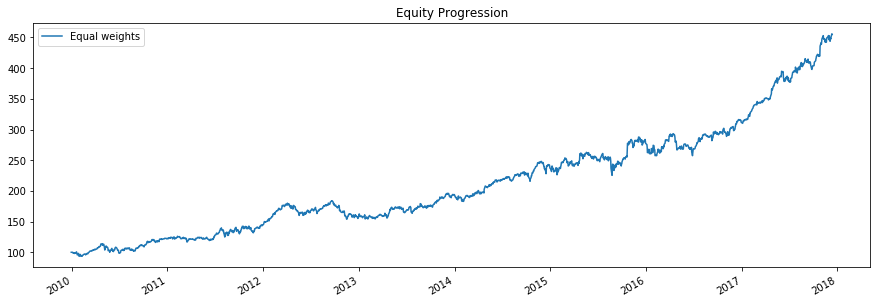

In [25]:
b_equal_weights = bt.Backtest(s_equal_weights, data)
result = bt.run(b_equal_weights)
result.plot()

We can display the same statistics we computed before, this time for the entire portfolio (and its monthly variations).

In [26]:
result.set_riskfree_rate(riskfree_rate)
result.display()

Stat                 Equal weights
-------------------  ---------------
Start                2009-12-30
End                  2017-12-12
Risk-free rate       4.44%

Total Return         354.91%
Daily Sharpe         1.00
Daily Sortino        1.40
CAGR                 20.99%
Max Drawdown         -16.32%
Calmar Ratio         1.29

MTD                  0.58%
3m                   11.06%
6m                   20.25%
YTD                  46.03%
1Y                   47.07%
3Y (ann.)            24.66%
5Y (ann.)            23.20%
10Y (ann.)           20.99%
Since Incep. (ann.)  20.99%

Daily Sharpe         1.00
Daily Sortino        1.40
Daily Mean (ann.)    20.36%
Daily Vol (ann.)     16.02%
Daily Skew           -0.09
Daily Kurt           2.96
Best Day             5.18%
Worst Day            -4.78%

Monthly Sharpe       1.07
Monthly Sortino      2.06
Monthly Mean (ann.)  20.16%
Monthly Vol (ann.)   14.84%
Monthly Skew         0.02
Monthly Kurt         -0.23
Best Month           13.72%
Worst Month  

We can plot the weight variations to have an idea of the algorithm decisions regarding our portfolio.

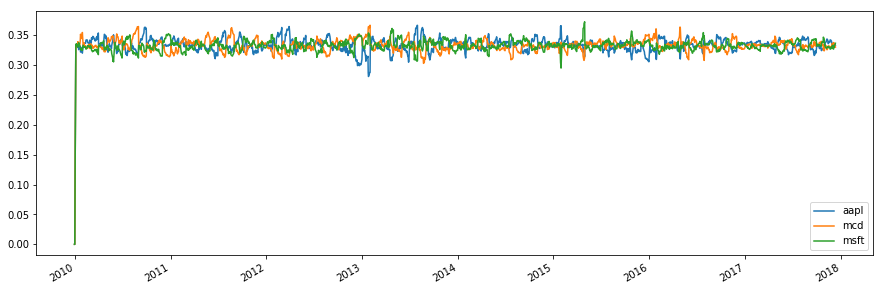

In [27]:
result.plot_security_weights()

Exercise 4. Let's compare this strategy to the Standard & Poor's 500 index.
1. Get the S&P index data from [Yahoo](https://finance.yahoo.com/).
2. Create a strategy that only buys S&P index.
3. Create a backtest on the data you fetched.
4. Run it !

Solution

In [28]:
data_spy = bt.get('spy', start='2010-01-01')

s_spy = bt.Strategy('S&P 500 only', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectThese(['spy']),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
                    
b_spy = bt.Backtest(s_spy, data_spy)

It is easier to run the two backtest at the same time in order to compare their results.

S&P 500 only
0% [############################# ] 100% | ETA: 00:00:00

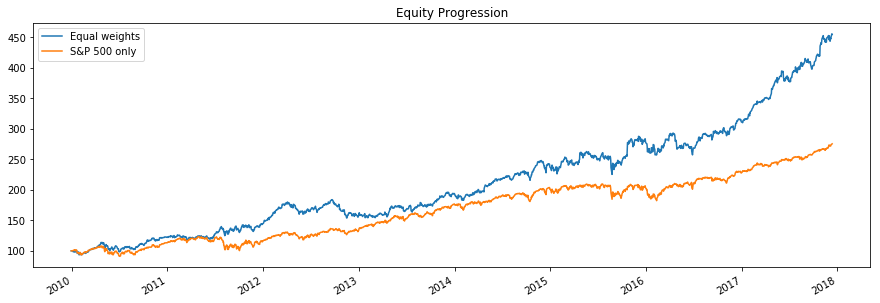

In [29]:
result = bt.run(b_equal_weights, b_spy)
result.plot()

## Selecting algos

### Frequency

The frequency can be just once using [RunOnce](http://pmorissette.github.io/bt/bt.html#bt.algos.RunOnce), a specific date using [RunOnDate](http://pmorissette.github.io/bt/bt.html#bt.algos.RunOnDate), or every n periods [RunEveryNPeriods](http://pmorissette.github.io/bt/bt.html#bt.algos.RunEveryNPeriods). The frequency can also be at the beginning of each day, week, month, quarter or year.
- [RunDaily](http://pmorissette.github.io/bt/bt.html#bt.algos.RunDaily)
- [RunWeekly](http://pmorissette.github.io/bt/bt.html#bt.algos.RunWeekly)
- Etc.

### Selection 

Let's see how we can select specific equities based on conditions. The algos we have are

- [SelectAll](http://pmorissette.github.io/bt/bt.html#bt.algos.SelectAll)
- SelectHasData
- SelectMomentum
- SelectN
- SelectRandomly
- SelectThese
- SelectWhere

We will use SelectRandomly to conduct a quick experiment. We will choose at random 10 securities among some of the most famous US companies, and invest in them equally.

In [30]:
equity_list = ['AAPL', 'MCD', 'MSFT', 'TGT', 'GE', 'AMZN', 'T', 'UPS', 'GM', 'IBM', 'PEP', 'VZ', 'DIS', 'INTC', 'FORD', 'CMCSA', 'IEF', 'SPY']
data = bt.get(equity_list, start='2010-01-01')
print data.head()

                 aapl        mcd       msft        tgt         ge        amzn  \
Date                                                                            
2010-11-18  39.498138  63.102322  21.433971  45.230335  12.661540  164.169998   
2010-11-19  39.280430  63.597443  21.309553  46.039764  12.803629  164.820007   
2010-11-22  40.129494  63.501625  21.342730  45.598259  12.653646  170.389999   
2010-11-23  39.536552  63.094341  20.836742  45.164921  12.440515  168.199997   
2010-11-24  40.313889  63.469688  21.044117  46.808319  12.582601  177.250000   

                    t        ups         gm         ibm        pep         vz  \
Date                                                                            
2010-11-18  19.699944  55.649567  29.012630  120.067238  52.443890  23.540281   
2010-11-19  19.616821  56.416920  29.072027  120.641174  52.395306  23.497013   
2010-11-22  19.596048  56.155689  28.919292  120.923935  52.387203  23.432125   
2010-11-23  19.415949  55.6

Exercise 5 : 
1. Let's build our random strategy. It is the same strategy as before, but this time we use SelectRandomly in our algo stack. We only select 10 securities.
2. Compare this strategy to the S & P Index.

In [ ]:
s_random = bt.Strategy('Random 10', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectRandomly(10),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_random = bt.Backtest(s_random, data)

result = bt.run(b_random, b_spy)

In [ ]:
result.set_riskfree_rate(riskfree_rate)
result.plot()

In [ ]:
result.display()

Our strategy is less efficient than the S & P, we did not beat the market.

Exercise : We want to code an algorithm that follow a simple strategy : only invest in the 5 securities that have the highest return, every month, among our list of famous US securities. Write the strategy, and compare it to the random strategy and the S & P index. Did we beat the market ?

### Weights

- WeighEqually WeighRandomly custom : WeighSpecified WeighTarget

Bt provides two ready-to-go strategies to weigh your portfolio.

- WeighInvVol, which weigh the assets proportionally to the inverse of their volatility. "This is a commonly used technique for risk parity portfolios. The least volatile elements receive the highest weight under this scheme."
- WeighERC, in which the weights are designed so each security is contributing in the amount to the portfolio overall volatility.
- WeighMeanVar, which is an implementation of Markowitz’s mean-variance optimization.

Let's try a strategy where we keep all the securities in data and we weigh them using the inverse of their volatility. Let's compare it the equal weight strategy.

In [31]:
s_inv = bt.Strategy('Inverse of Volatility', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighInvVol(),
                       bt.algos.Rebalance()])

b_inv = bt.Backtest(s_inv, data)

Inverse of Volatility
0% [############################# ] 100% | ETA: 00:00:00

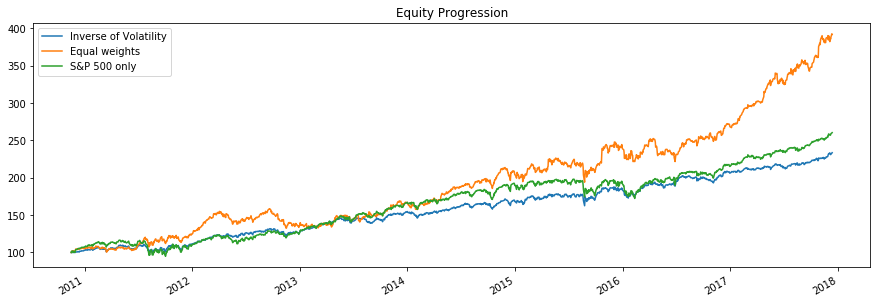

In [32]:
result = bt.run(b_inv, b_equal_weights, b_spy)
result.plot()

In [ ]:
result.display()

What can we conclude ?

Exercice : Create a strategy that will take all the securities and weigh the securities according to Markowitz Mean-Variance portfolio theory. Compare it to the others.

Solution

## Customising strategies

As we have seen, there is two bt.algos that enable us to manually select and attribute weights :
- [SelectWhere](http://pmorissette.github.io/bt/bt.html?#bt.algos.SelectWhere)
- [WeighTarget](http://pmorissette.github.io/bt/bt.html?#bt.algos.WeighTarget)

They take as argument a DataFrame indicating True or False for SelectWhere and the weights for WeighTarget.

Let's start with SelectWhere. We need to give it a boolean DataFrame, which is composed only of True or False.

In [36]:
print data.tail()

                  aapl         mcd       msft        tgt         ge  \
Date                                                                  
2017-12-06  169.009995  173.479996  82.779999  60.720001  17.660000   
2017-12-07  169.320007  172.910004  82.489998  61.090000  17.709999   
2017-12-08  169.369995  173.149994  84.160004  61.369999  17.709999   
2017-12-11  172.669998  173.250000  85.230003  61.759998  17.650000   
2017-12-12  171.699997  172.229996  85.580002  61.020000  17.910000   

                   amzn          t         ups         gm         ibm  \
Date                                                                    
2017-12-06  1152.349976  36.110001  118.290001  41.770000  154.100006   
2017-12-07  1159.790039  36.169998  119.730003  42.020000  153.570007   
2017-12-08  1162.000000  36.730000  119.559998  42.020000  154.809998   
2017-12-11  1168.920044  36.900002  118.050003  41.669998  155.410004   
2017-12-12  1165.079956  38.099998  118.160004  41.529999  156.7

In [37]:
selection = data > 100
print selection.tail()

            aapl   mcd   msft    tgt     ge  amzn      t   ups     gm   ibm  \
Date                                                                          
2017-12-06  True  True  False  False  False  True  False  True  False  True   
2017-12-07  True  True  False  False  False  True  False  True  False  True   
2017-12-08  True  True  False  False  False  True  False  True  False  True   
2017-12-11  True  True  False  False  False  True  False  True  False  True   
2017-12-12  True  True  False  False  False  True  False  True  False  True   

             pep     vz   dis   intc   ford  cmcsa   ief   spy  
Date                                                            
2017-12-06  True  False  True  False  False  False  True  True  
2017-12-07  True  False  True  False  False  False  True  True  
2017-12-08  True  False  True  False  False  False  True  True  
2017-12-11  True  False  True  False  False  False  True  True  
2017-12-12  True  False  True  False  False  False  True

Let's create a strategy based on this boolean DataFrame:

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

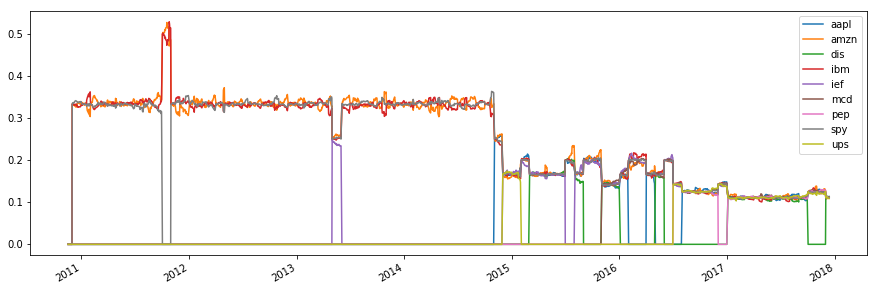

In [38]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection)
result.plot_security_weights()

We can use all the price methods in bt (and [ffn](http://pmorissette.github.io)) to change our data and establish interesting conditions. We can also change our data using pandas method. For instance, let's establish the following strategy : we want to invest in securities who are going up.

In [40]:
print data.to_returns().head()

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2010-11-18       NaN       NaN       NaN       NaN       NaN       NaN   
2010-11-19 -0.005512  0.007846 -0.005805  0.017896  0.011222  0.003959   
2010-11-22  0.021615 -0.001507  0.001557 -0.009590 -0.011714  0.033794   
2010-11-23 -0.014776 -0.006414 -0.023708 -0.009503 -0.016843 -0.012853   
2010-11-24  0.019661  0.005949  0.009952  0.036387  0.011421  0.053805   

                   t       ups        gm       ibm       pep        vz  \
Date                                                                     
2010-11-18       NaN       NaN       NaN       NaN       NaN       NaN   
2010-11-19 -0.004219  0.013789  0.002047  0.004780 -0.000926 -0.001838   
2010-11-22 -0.001059 -0.004630 -0.005254  0.002344 -0.000155 -0.002762   
2010-11-23 -0.009191 -0.009158 -0.024355 -0.015201 -0.012519 -0.003385   
2010-11-24  0.003924  0.020980  0.006

In [42]:
selection = data.to_returns() > 0
print selection.head()

             aapl    mcd   msft    tgt     ge   amzn      t    ups     gm  \
Date                                                                        
2010-11-18  False  False  False  False  False  False  False  False  False   
2010-11-19  False   True  False   True   True   True  False   True   True   
2010-11-22   True  False   True  False  False   True  False  False  False   
2010-11-23  False  False  False  False  False  False  False  False  False   
2010-11-24   True   True   True   True   True   True   True   True   True   

              ibm    pep     vz    dis   intc   ford  cmcsa    ief    spy  
Date                                                                       
2010-11-18  False  False  False  False  False  False  False  False  False  
2010-11-19   True  False  False  False   True   True  False   True   True  
2010-11-22   True  False  False  False   True  False  False   True  False  
2010-11-23  False  False  False  False  False   True  False   True  False  
2010

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

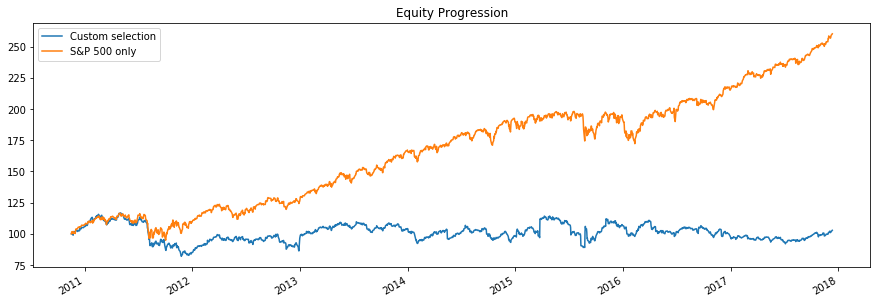

In [43]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunDaily(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection, b_spy)
result.plot()

It does not seem to be a good strategy.

Another possibility is to use the pandas DataFrame method [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) to consider moving averages.

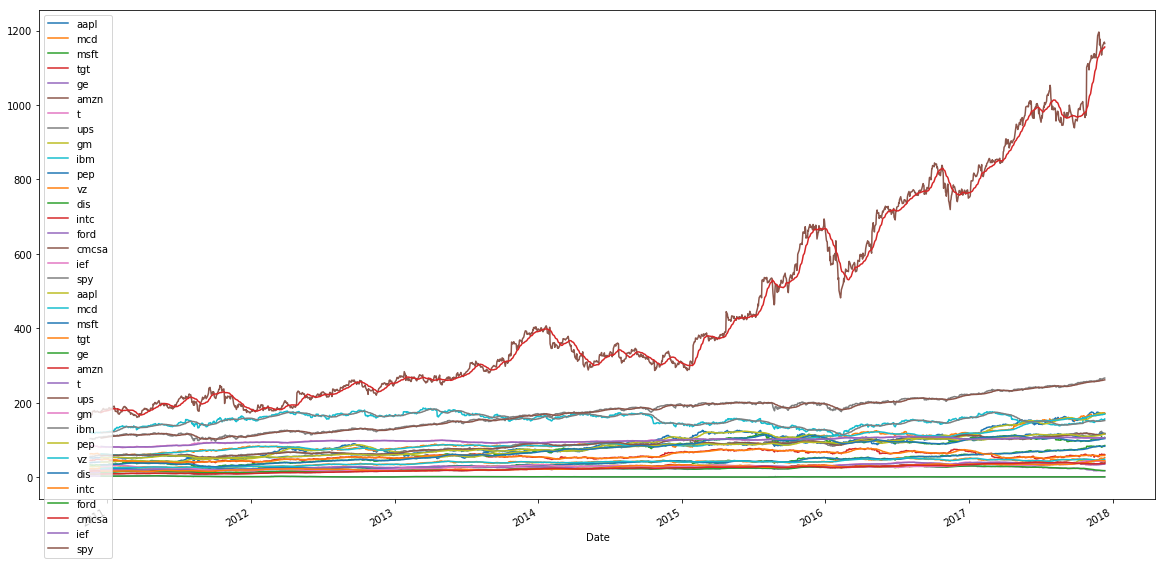

In [44]:
moving_average_data = data.rolling(20).mean()
bt.merge(data, moving_average_data).plot(figsize = (20, 10))

In [45]:
selection = data > moving_average_data

Custom selection
0% [############################# ] 100% | ETA: 00:00:00

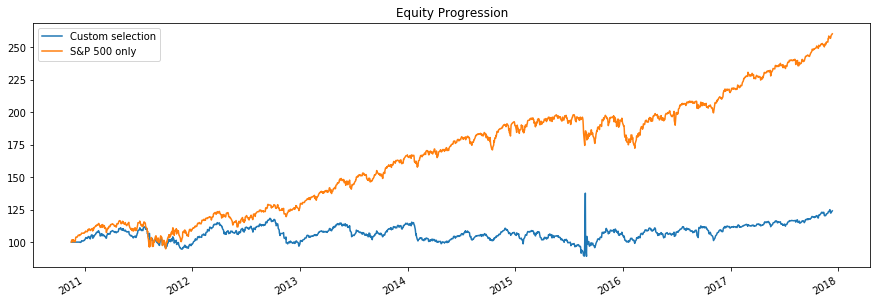

In [46]:
s_custom_selection = bt.Strategy('Custom selection', 
                       [bt.algos.RunDaily(),
                       bt.algos.SelectWhere(selection),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

b_custom_selection = bt.Backtest(s_custom_selection, data)
result = bt.run(b_custom_selection, b_spy)
result.plot()

Exercise: A classic strategy is to compare a moving average over a long period (50 days for instance) and another moving average over a shorter period, (let's say 15 days). If the more recent moving average is above, then some investors consider it as a signal of an uptrend. 

Apply this strategy to your data, simulate the results: is it efficient ?

Solution

Another exercise (a bit difficult but you can do it...) : You wish to evaluate the volatility of the securities before investing.
1. Compute the dataset with a daily standard deviation over the last 10 periods.
2. Compute the price mean over the last 10 periods, daily.
3. Invest only in equities whose ratio std / mean is below 5% (over the last 10 periods).

Ok, we can do exactly the same with weights. All we have to do is provide a DataFrame with custom weights. It is a bit more difficult though, because we have to make sure that all the weights sum up to 1. A little trick to transform any value in proportionate weight :

In [58]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
print df

   col1  col2
0     1     3
1     2     4


In [ ]:
print df.sum(axis=1)

In [64]:
print df.div(df.sum(axis=1), axis=0)

       col1      col2
0  0.250000  0.750000
1  0.333333  0.666667


Let's apply this to our DataFrame data.

In [49]:
print data.head()

                 aapl        mcd       msft        tgt         ge        amzn  \
Date                                                                            
2010-11-18  39.498138  63.102322  21.433971  45.230335  12.661540  164.169998   
2010-11-19  39.280430  63.597443  21.309553  46.039764  12.803629  164.820007   
2010-11-22  40.129494  63.501625  21.342730  45.598259  12.653646  170.389999   
2010-11-23  39.536552  63.094341  20.836742  45.164921  12.440515  168.199997   
2010-11-24  40.313889  63.469688  21.044117  46.808319  12.582601  177.250000   

                    t        ups         gm         ibm        pep         vz  \
Date                                                                            
2010-11-18  19.699944  55.649567  29.012630  120.067238  52.443890  23.540281   
2010-11-19  19.616821  56.416920  29.072027  120.641174  52.395306  23.497013   
2010-11-22  19.596048  56.155689  28.919292  120.923935  52.387203  23.432125   
2010-11-23  19.415949  55.6

In [50]:
print data.div(data.sum(axis=1), axis=0).head()

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2010-11-18  0.044018  0.070324  0.023887  0.050406  0.014111  0.182957   
2010-11-19  0.043626  0.070634  0.023667  0.051134  0.014220  0.183055   
2010-11-22  0.044281  0.070071  0.023551  0.050316  0.013963  0.188018   
2010-11-23  0.044141  0.070442  0.023263  0.050425  0.013889  0.187789   
2010-11-24  0.044122  0.069465  0.023032  0.051229  0.013771  0.193992   

                   t       ups        gm       ibm       pep        vz  \
Date                                                                     
2010-11-18  0.021954  0.062018  0.032333  0.133808  0.058446  0.026234   
2010-11-19  0.021787  0.062659  0.032289  0.133989  0.058192  0.026097   
2010-11-22  0.021623  0.061965  0.031911  0.133434  0.057807  0.025856   
2010-11-23  0.021677  0.062121  0.031501  0.132955  0.057756  0.026073   
2010-11-24  0.021333  0.062174  0.031

We can apply this strategy to any transformation of ou dataframe. For instance, if we take the inverse of the standard deviation, we can create weights from it. Let's compute daily a three month (about 57 quotes) standard deviation.

In [65]:
std = data.to_returns().rolling(57).std()
print std.tail()

                aapl       mcd      msft       tgt        ge      amzn  \
Date                                                                     
2017-12-06  0.011484  0.008528  0.012019  0.024691  0.019202  0.020189   
2017-12-07  0.011425  0.008544  0.012029  0.024615  0.018880  0.020082   
2017-12-08  0.011425  0.008535  0.012273  0.024615  0.018880  0.020056   
2017-12-11  0.011413  0.008332  0.012296  0.024623  0.018832  0.020059   
2017-12-12  0.011168  0.008341  0.012187  0.024582  0.018771  0.020013   

                   t       ups        gm       ibm       pep        vz  \
Date                                                                     
2017-12-06  0.014439  0.010749  0.014692  0.013742  0.007299  0.011669   
2017-12-07  0.014393  0.010856  0.014653  0.013750  0.007721  0.011690   
2017-12-08  0.014262  0.010832  0.014654  0.013775  0.007698  0.011322   
2017-12-11  0.014254  0.010931  0.014709  0.013727  0.007661  0.011466   
2017-12-12  0.014887  0.010910  0.014

Let's take the elementwise inverse (1/element).

In [67]:
inv_std = 1 / std

We can now build a weight matrix from it.

In [ ]:
inv_std_weights = inv_std.div(inv_std.sum(axis=1), axis=0)
print inv_std_weights.tail()

Let's weight our portfolio using this weight matrix ! And let's compare it to the bt algo that does exactly the same thing.

In [ ]:
s_custom_weighting = bt.Strategy('Custom weighting', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighTarget(inv_std_weights),
                       bt.algos.Rebalance()])

b_custom_weighting = bt.Backtest(s_custom_weighting, data)
result = bt.run(b_custom_weighting, b_inv, b_spy)
result.plot()

We manage to reproduce manually the WeighInv algo.

Exercise : Let's try the opposite strategy ! Invest more in securities that are more volatile !

Solution

## Combining several strategies

Bt is built waround the idea of building [trees of strategies](http://pmorissette.github.io/bt/tree.html). We can indicate other strategy to a strategies. Let's see an example.

In [ ]:
s_both = bt.Strategy('Both', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [s_custom_weighting, s_spy])
b_both = bt.Backtest(s_both, data)
result = bt.run(b_both, b_custom_weighting, b_spy)
result.plot()

This opens a lot of possibilities ! We can have portfolios of a lot of different strategies, and we can design a strategy to select / weight these strategies depending on their performance or their volatility.

## Using professional data

We will now see how to use a more serious data provider, [Quandl](https://www.quandl.com/). Quandl has its own Python package to make fetching data easy. (If you are on your own Python notebook / IDE, please run `pip install quandl`.

In [ ]:
import quandl

A full documentation on how to use quandl is available [here](https://docs.quandl.com/docs).

As all data providers, Quandl needs you to register, and will give you an API key. This is a key you put in your code (Python, R, or any other language). It is used to open the access to the data, and Quandl uses it to monitor your data consumption. A free account is limited. If you want to access top notch data (such as real time data), you will need to pay. We will use a free account.

Once you are on [Quandl](https://www.quandl.com/), click on SIGN IN on the top-right corner and create an account. Quandl will give you your API key straightaway : please copy and paste it below.

In [ ]:
my_api_key = 

Let's tell Quandl our api key.

In [ ]:
quandl.ApiConfig.api_key = my_api_key

Quandl has a method similar to bt.get(). It is quandl.get():

In [ ]:
help(quandl.get)

A more complete documentation can be found [here](https://docs.quandl.com/docs/parameters-2#section-times-series-parameters). It is pretty straightforward. We use it almost the same way we use bt.get(), except quandl has a lot a databases, so we have to specify the database before the ticker symbol. WIKI is the name of the database. 

In [68]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01')
print data.head()

NameError: name 'quandl' is not defined

To keep things simple, we are only interested in the Close price. We could select the right column in the pandas DataFrame:

In [ ]:
print data[['Close']].head()

But this leaves a big data object in our memory, and we will not be using most of it. In the [documentation](https://docs.quandl.com/docs/parameters-2#section-times-series-parameters), we can see that the `column_index` option can be used to select the columns. Here we are only interested in the fourth column.

In [ ]:
data = quandl.get('WIKI/AAPL', start_date = '2016-01-01', column_index = 4)
print data.head()

Let's try with our list of equities, `equity_list`.

In [69]:
print equity_list

['AAPL', 'MCD', 'MSFT', 'TGT', 'GE', 'AMZN', 'T', 'UPS', 'GM', 'IBM', 'PEP', 'VZ', 'DIS', 'INTC', 'FORD', 'CMCSA', 'IEF', 'SPY']


We need to add the name of database for Quandl to understand what to fetch.

In [70]:
wiki_equity_list = []
for ticker in equity_list:
    wiki_equity_list.append('WIKI/' + ticker)
print wiki_equity_list

['WIKI/AAPL', 'WIKI/MCD', 'WIKI/MSFT', 'WIKI/TGT', 'WIKI/GE', 'WIKI/AMZN', 'WIKI/T', 'WIKI/UPS', 'WIKI/GM', 'WIKI/IBM', 'WIKI/PEP', 'WIKI/VZ', 'WIKI/DIS', 'WIKI/INTC', 'WIKI/FORD', 'WIKI/CMCSA', 'WIKI/IEF', 'WIKI/SPY']


Great ! Now we can fetch our data.

In [ ]:
data = quandl.get(wiki_equity_list, start_date = '2016-01-01', column_index = 4)
print data.head()

Perfect. If we want to fetch a big number of ticker symbol, it is more convenient to read the list of ticker symbol from a csv file. Here is how to do it.

In [ ]:
big_list = []
import csv
with open('WIKI-datasets-codes.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        big_list.append(row[0])

big_list.pop(1)
big_list.pop(1)
print big_list[:20]

In [ ]:
data = quandl.get(big_list[:50], start_date = '2016-05-01', column_index = 4)
print data.head()

Let's clean the missing data.

In [ ]:
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='all', inplace=True)
print data.head()

In [ ]:
s1 = bt.Strategy('Best 10', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.SelectMomentum(10, lookback = pd.DateOffset(months=2)),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
best10 = bt.Backtest(s1, data)
result = bt.run(best10)
result.plot()

## Putting it all into practice

Choose any data on any company from any market, using Quandl. You can check all the databases [here](https://www.quandl.com/search?query=).

Imagine we are the first of January, 2016.

Choose a strategy. Run a backtest on it. Choose the length of the backtest according to your strategey : one month, one year, 5 years...

Then test the strategy from the 1st of January 2016 to now. Did you beat the market ? Why ? What would you change ?

(Please do not cheat and run a lot of strategies until you find one that has good returns. The mark will not depend on the return you achieved !).

## Going further

Now you know how to:
- Use Python;
- Read, run and write IPython Notebooks (= Jupyter Notebooks)
- Import a new package, use `help()` and the documentation to learn everything about the package;
- Use bt and pandas' DataFrames;
- Automatically fetch financial data from a professional source using your own API key;
- Compute basic stats and financial indicators about any equity over any period, and draw nice plots to go with it;
- Design simple and complex automated trading strategies;
- Test them over any period to assess their efficiency.

What you can do to go further:
- Keep on using Python to do things, learn more about it;
- Learn more about Pandas and data structures in Python;
- Learn more about bt to make your strategies a bit more realistic; for instance, you can set up commissions fees that will impact your portfolio returns. You can also use methods surch as [LimitDeltas](http://pmorissette.github.io/bt/bt.html#bt.algos.LimitDeltas) and [LimitWeights](http://pmorissette.github.io/bt/bt.html#bt.algos.LimitWeights) to avoid big changes in your portfolio.
- Discover other BackTesting and trading tools in Python: bt is great to start but more complete tools exist. See [here](https://www.quantstart.com/articles/backtesting-systematic-trading-strategies-in-python-considerations-and-open-source-frameworks) for a review of the possibilities.
- Use everything that your learned to experiment and test what you see in financial courses, in the news or elsewhere: using Python, Pandas and a backtesting tool such as bt, you can write strategies to test most of the theoretical things you can come across. You can use this online notebook to run things, it will remain here for a while.
- Discover the world of algorithmic trading, with different views (technical trading, fundamentalist trading, high frequency arbitrage...). You can have a glance at it thanks to online communities such as [Quantopian](https://www.quantopian.com/posts).
- Need anything ? You can email me at [nicolas.mauhe@u-bordeaux.fr](mailto:nicolas.mauhe@u-bordeaux.fr)